# Sign Language Detection 
In this project I will be developing a model to detect sign language digits.

## Technology
1. Tensorflow
2. Keras' Functional API

## Table of content
1. Load Dataset

## Load dataset
This SIGNS dataset is a collection of 6 signs representing numbers from 0 to 5

In [6]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline

In [9]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


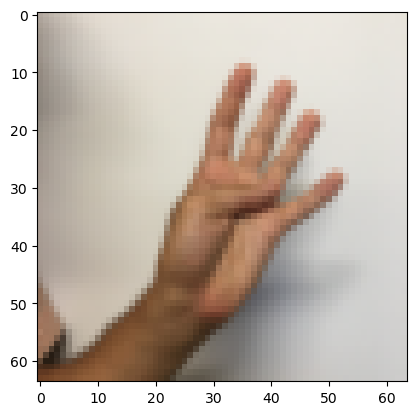

In [14]:
# Example image from the dataset
index = 5
plt.imshow(X_train_orig[index])
print("y = %s" % (str(np.squeeze(Y_train_orig[:, index]))))

## Prepare Train/Test sets and examin the dataset its size and shape


In [19]:
X_train = X_train_orig/255
X_test = X_test_orig/255
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print("Number of training examples : %s" % (str(X_train.shape[0])))
print("Number of test samples : %s" % (str(X_test.shape[0])))
print("X_train shape : %s" % (str(X_train.shape)))
print("Y train shape : %s" % (str(Y_train.shape)))
print("X_test shape : %s" % (str(X_test.shape)))
print("Y_test shape : %s" % (str(Y_test.shape)))

Number of training examples : 1080
Number of test samples : 120
X_train shape : (1080, 64, 64, 3)
Y train shape : (1080, 6)
X_test shape : (120, 64, 64, 3)
Y_test shape : (120, 6)


## Implement Forward Propagation using convolutoinal model
I will be using following structure for this model

`CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE`

In [20]:
def convolutional_model(input_shape):
    """
    Implement the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)
    
    Returns -- Tensorflow Keras model
    """
    
    input_img = tf.keras.Input(shape=input_shape)
    
    Z1 = tfl.Conv2D(8, 4, strides=1, padding='same')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=8, strides=8, padding='same')(A1)
    
    Z2 = tfl.Conv2D(16, 2, strides=1, padding='same')(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=4, strides=4, padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(units=6, activation='softmax')(F)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    
    return model

## Create the model and compile it

In [21]:
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
conv_model = convolutional_model(input_shape)
conv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Summary of the model

In [22]:
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         392       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 8)           0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 16)          0         
                                                             

## Train the model
Here I choose mini-bathces of 64 training examples.

In [23]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 1s 33ms/step - loss: 1.8479 - accuracy: 0.1630 - val_loss: 1.7958 - val_accuracy: 0.1667
Epoch 2/100
17/17 [==============================] - 0s 25ms/step - loss: 1.7976 - accuracy: 0.1787 - val_loss: 1.7903 - val_accuracy: 0.1583
Epoch 3/100
17/17 [==============================] - 0s 27ms/step - loss: 1.7913 - accuracy: 0.1870 - val_loss: 1.7853 - val_accuracy: 0.1917
Epoch 4/100
17/17 [==============================] - 0s 26ms/step - loss: 1.7874 - accuracy: 0.1713 - val_loss: 1.7820 - val_accuracy: 0.2417
Epoch 5/100
17/17 [==============================] - 0s 25ms/step - loss: 1.7846 - accuracy: 0.2213 - val_loss: 1.7790 - val_accuracy: 0.2500
Epoch 6/100
17/17 [==============================] - 0s 25ms/step - loss: 1.7823 - accuracy: 0.2194 - val_loss: 1.7765 - val_accuracy: 0.2833
Epoch 7/100
17/17 [==============================] - 0s 25ms/step - loss: 1.7792 - accuracy: 0.2500 - val_loss: 1.7738 - val_accuracy: 0.3167
Epoch 

## History object
The History object is an output of the `.fit()` operation, and provides a record of all the loss and metric values in memory. It's stored as a dictionary that we can retrieve by calling `history.history`

In [24]:
# call history object
history.history

{'loss': [1.8478710651397705,
  1.7976303100585938,
  1.791306972503662,
  1.7874475717544556,
  1.7846182584762573,
  1.7823439836502075,
  1.7791622877120972,
  1.7757247686386108,
  1.771513819694519,
  1.766178011894226,
  1.760055422782898,
  1.7532813549041748,
  1.7447590827941895,
  1.7339462041854858,
  1.7203378677368164,
  1.7036007642745972,
  1.6836984157562256,
  1.6597609519958496,
  1.631544589996338,
  1.6002482175827026,
  1.567482829093933,
  1.5309089422225952,
  1.492468237876892,
  1.455734133720398,
  1.4194175004959106,
  1.384214162826538,
  1.348824381828308,
  1.3143067359924316,
  1.2840585708618164,
  1.2550225257873535,
  1.2267165184020996,
  1.2007936239242554,
  1.1763134002685547,
  1.1536811590194702,
  1.1306179761886597,
  1.1093491315841675,
  1.0893114805221558,
  1.0700939893722534,
  1.0512135028839111,
  1.033448338508606,
  1.017167329788208,
  1.0005528926849365,
  0.984593391418457,
  0.9688704609870911,
  0.9541831612586975,
  0.94023144245

Now we can visualize loss over time using `history.history`

The `history.history["loss"]` entry is a dictionary with as many as many values as epochs that the model was trained.

In [25]:
df_loss_acc = pd.DataFrame(history.history)
df_loss_acc

,loss,accuracy,val_loss,val_accuracy
0,1.847871,0.162963,1.795836,0.166667
1,1.797630,0.178704,1.790275,0.158333
2,1.791307,0.187037,1.785349,0.191667
3,1.787448,0.171296,1.782025,0.241667
4,1.784618,0.221296,1.779004,0.250000
...,...,...,...,...
95,0.582161,0.806481,0.658842,0.758333
96,0.578407,0.808333,0.656160,0.766667
97,0.574983,0.810185,0.652728,0.766667
98,0.571716,0.808333,0.649167,0.766667


In [29]:
df_loss = df_loss_acc.loc[:, ['loss', 'val_loss']]
df_loss.rename(columns={'loss': 'train', 'val_loss': 'validation'}, inplace=True)
df_loss

,train,validation
0,1.847871,1.795836
1,1.797630,1.790275
2,1.791307,1.785349
3,1.787448,1.782025
4,1.784618,1.779004
...,...,...
95,0.582161,0.658842
96,0.578407,0.656160
97,0.574983,0.652728
98,0.571716,0.649167


In [30]:
df_acc = df_loss_acc.loc[:, ['accuracy', 'val_accuracy']]
df_acc.rename(columns={'accuracy': 'train', 'val_accuracy': 'validation'}, inplace=True)
df_acc

,train,validation
0,0.162963,0.166667
1,0.178704,0.158333
2,0.187037,0.191667
3,0.171296,0.241667
4,0.221296,0.250000
...,...,...
95,0.806481,0.758333
96,0.808333,0.766667
97,0.810185,0.766667
98,0.808333,0.766667


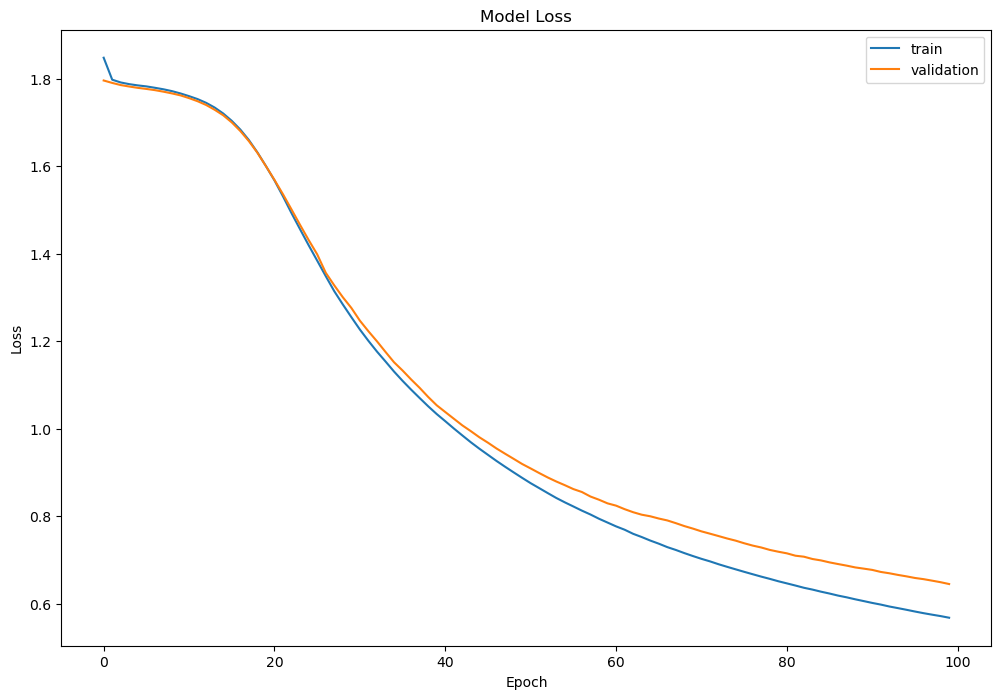

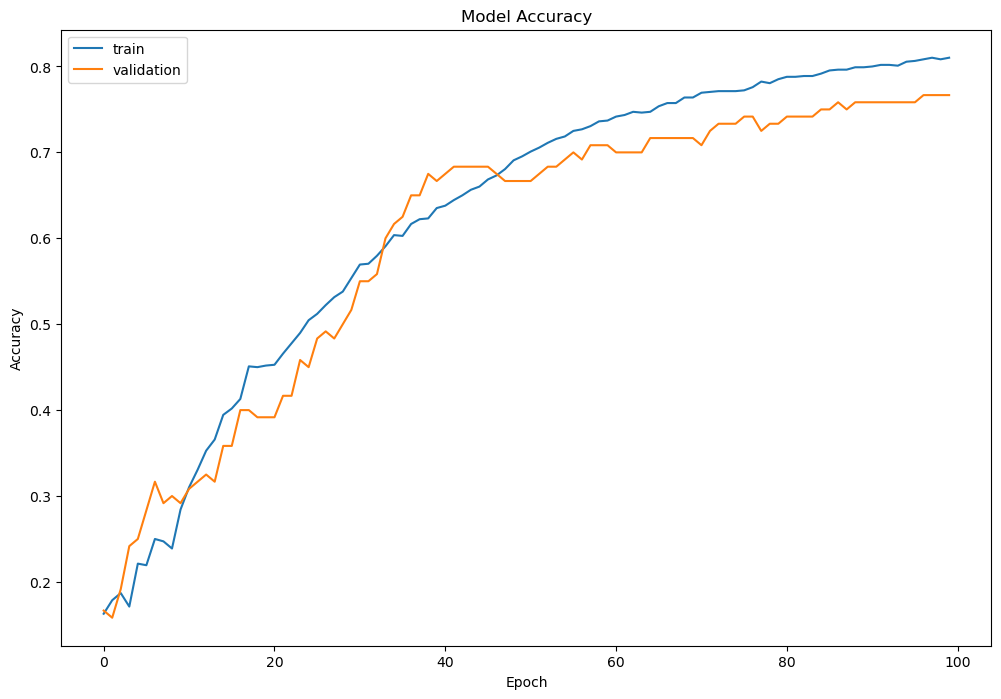

In [32]:
df_loss.plot(title="Model Loss", figsize=(12, 8)).set(xlabel="Epoch", ylabel="Loss")
df_acc.plot(title="Model Accuracy", figsize=(12, 8)).set(xlabel="Epoch", ylabel="Accuracy")
plt.show()